<a href="https://colab.research.google.com/github/NakkaAnkarao8/cancer-detection/blob/main/Predicting_Cancer_Types.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
data_train = pd.read_csv('/content/drive/MyDrive/data/data_train.csv')
data_test = pd.read_csv('/content/drive/MyDrive/data/data_test.csv')
labels = pd.read_csv('/content/drive/MyDrive/data/Copy of actual.csv')

In [4]:
data_train.head(5)

,Gene Description,Gene Accession Number,1,call,2,call.1,3,call.2,4,call.3,...,29,call.33,30,call.34,31,call.35,32,call.36,33,call.37
0,AFFX-BioB-5_at (endogenous control),AFFX-BioB-5_at,-214,A,-139,A,-76,A,-135,A,...,15,A,-318,A,-32,A,-124,A,-135,A
1,AFFX-BioB-M_at (endogenous control),AFFX-BioB-M_at,-153,A,-73,A,-49,A,-114,A,...,-114,A,-192,A,-49,A,-79,A,-186,A
2,AFFX-BioB-3_at (endogenous control),AFFX-BioB-3_at,-58,A,-1,A,-307,A,265,A,...,2,A,-95,A,49,A,-37,A,-70,A
3,AFFX-BioC-5_at (endogenous control),AFFX-BioC-5_at,88,A,283,A,309,A,12,A,...,193,A,312,A,230,P,330,A,337,A
4,AFFX-BioC-3_at (endogenous control),AFFX-BioC-3_at,-295,A,-264,A,-376,A,-419,A,...,-51,A,-139,A,-367,A,-188,A,-407,A


In [5]:
data_train.tail(5)

,Gene Description,Gene Accession Number,1,call,2,call.1,3,call.2,4,call.3,...,29,call.33,30,call.34,31,call.35,32,call.36,33,call.37
7124,PTGER3 Prostaglandin E receptor 3 (subtype EP3...,X83863_at,793,A,782,A,1138,A,627,A,...,279,A,737,A,588,A,1170,A,2315,A
7125,HMG2 High-mobility group (nonhistone chromosom...,Z17240_at,329,A,295,A,777,P,170,A,...,51,A,227,A,361,A,284,A,250,A
7126,RB1 Retinoblastoma 1 (including osteosarcoma),L49218_f_at,36,A,11,A,41,A,-50,A,...,6,A,-9,A,-26,A,39,A,-12,A
7127,GB DEF = Glycophorin Sta (type A) exons 3 and ...,M71243_f_at,191,A,76,A,228,A,126,A,...,2484,P,371,A,133,A,298,A,790,P
7128,GB DEF = mRNA (clone 1A7),Z78285_f_at,-37,A,-14,A,-41,A,-91,A,...,-2,A,-31,A,-32,A,-3,A,-10,A


In [6]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7129 entries, 0 to 7128
Data columns (total 78 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Gene Description       7129 non-null   object
 1   Gene Accession Number  7129 non-null   object
 2   1                      7129 non-null   int64 
 3   call                   7129 non-null   object
 4   2                      7129 non-null   int64 
 5   call.1                 7129 non-null   object
 6   3                      7129 non-null   int64 
 7   call.2                 7129 non-null   object
 8   4                      7129 non-null   int64 
 9   call.3                 7129 non-null   object
 10  5                      7129 non-null   int64 
 11  call.4                 7129 non-null   object
 12  6                      7129 non-null   int64 
 13  call.5                 7129 non-null   object
 14  7                      7129 non-null   int64 
 15  call.6               

In [7]:
data_train.describe()

,1,2,3,4,5,6,7,8,9,10,...,35,36,37,38,28,29,30,31,32,33
count,7129.000000,7129.000000,7129.000000,7129.000000,7129.000000,7129.000000,7129.000000,7129.000000,7129.000000,7129.000000,...,7129.000000,7129.000000,7129.000000,7129.000000,7129.000000,7129.000000,7129.000000,7129.000000,7129.000000,7129.000000
mean,641.367092,690.246318,698.307897,600.985271,679.532894,564.797728,584.437649,571.359097,789.713705,599.483097,...,514.496704,775.143498,689.248141,626.885959,673.279422,556.463179,718.934493,598.648899,676.920887,723.563473
std,2264.294361,2468.814372,2485.656277,2340.047428,2375.895416,2494.604090,2412.812263,2378.780450,2580.157021,2421.156219,...,2440.722824,2676.664777,2543.537830,2473.180838,2413.149603,2376.681824,2533.678058,2405.268550,2436.964933,2507.382019
min,-19826.000000,-17930.000000,-27182.000000,-23396.000000,-10339.000000,-21658.000000,-24024.000000,-27570.000000,-25171.000000,-12500.000000,...,-16281.000000,-27398.000000,-23673.000000,-23645.000000,-20376.000000,-9501.000000,-17580.000000,-25491.000000,-28400.000000,-27811.000000
25%,-21.000000,-14.000000,-31.000000,-33.000000,8.000000,-26.000000,-33.000000,-58.000000,-14.000000,-15.000000,...,-43.000000,-27.000000,-23.000000,-22.000000,-16.000000,-13.000000,-25.000000,-32.000000,-22.000000,-38.000000
50%,159.000000,130.000000,177.000000,139.000000,146.000000,106.000000,134.000000,140.000000,166.000000,103.000000,...,108.000000,144.000000,134.000000,133.000000,150.000000,82.000000,128.000000,107.000000,155.000000,170.000000
75%,535.000000,488.000000,610.000000,497.000000,471.000000,401.000000,497.000000,527.000000,609.000000,386.000000,...,396.000000,569.000000,505.000000,490.000000,517.000000,309.000000,488.000000,443.000000,549.000000,649.000000
max,31086.000000,29288.000000,28056.000000,31449.000000,29543.000000,38467.000000,41911.000000,40065.000000,23602.000000,28033.000000,...,61228.000000,37164.000000,32204.000000,29169.000000,29833.000000,30354.000000,25055.000000,28350.000000,25093.000000,32946.000000


In [8]:
data_train.isnull().sum()

Gene Description         0
Gene Accession Number    0
1                        0
call                     0
2                        0
                        ..
call.35                  0
32                       0
call.36                  0
33                       0
call.37                  0
Length: 78, dtype: int64

<Axes: >

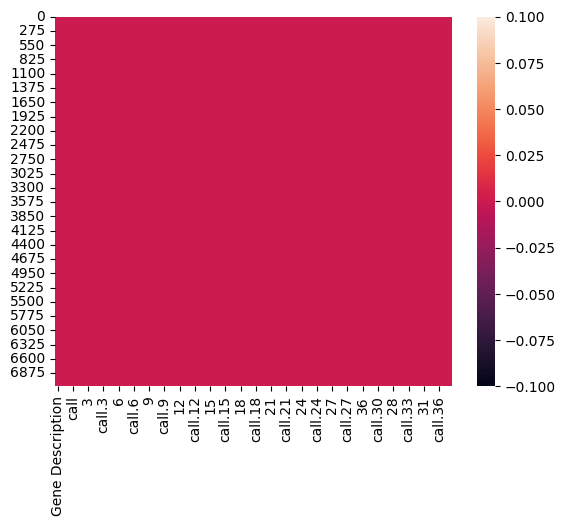

In [9]:
sns.heatmap(data_train.isnull())

In [10]:
data_test.head(5)

,Gene Description,Gene Accession Number,39,call,40,call.1,42,call.2,47,call.3,...,65,call.29,66,call.30,63,call.31,64,call.32,62,call.33
0,AFFX-BioB-5_at (endogenous control),AFFX-BioB-5_at,-342,A,-87,A,22,A,-243,A,...,-62,A,-58,A,-161,A,-48,A,-176,A
1,AFFX-BioB-M_at (endogenous control),AFFX-BioB-M_at,-200,A,-248,A,-153,A,-218,A,...,-198,A,-217,A,-215,A,-531,A,-284,A
2,AFFX-BioB-3_at (endogenous control),AFFX-BioB-3_at,41,A,262,A,17,A,-163,A,...,-5,A,63,A,-46,A,-124,A,-81,A
3,AFFX-BioC-5_at (endogenous control),AFFX-BioC-5_at,328,A,295,A,276,A,182,A,...,141,A,95,A,146,A,431,A,9,A
4,AFFX-BioC-3_at (endogenous control),AFFX-BioC-3_at,-224,A,-226,A,-211,A,-289,A,...,-256,A,-191,A,-172,A,-496,A,-294,A


In [17]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7129 entries, 0 to 7128
Data columns (total 70 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Gene Description       7129 non-null   object
 1   Gene Accession Number  7129 non-null   object
 2   39                     7129 non-null   int64 
 3   call                   7129 non-null   object
 4   40                     7129 non-null   int64 
 5   call.1                 7129 non-null   object
 6   42                     7129 non-null   int64 
 7   call.2                 7129 non-null   object
 8   47                     7129 non-null   int64 
 9   call.3                 7129 non-null   object
 10  48                     7129 non-null   int64 
 11  call.4                 7129 non-null   object
 12  49                     7129 non-null   int64 
 13  call.5                 7129 non-null   object
 14  41                     7129 non-null   int64 
 15  call.6               

In [11]:
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import recall_score, precision_score, classification_report,accuracy_score,confusion_matrix, roc_curve, auc, roc_curve,accuracy_score
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from scipy import ndimage

In [12]:
#check for nulls
print(data_train.isna().sum().max())
print(data_test.isna().sum().max())

0
0


In [18]:
#drop 'call' columns
cols = [col for col in data_train.columns if 'call' in col]
train = data_train.drop(cols, 1)

<ipython-input-18-e09c7e93b779>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  train = data_train.drop(cols, 1)


In [19]:
cols = [col for col in data_test.columns if 'call' in col]
test = data_test.drop(cols, 1)

<ipython-input-19-3f17be8ff808>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  test = data_test.drop(cols, 1)


In [20]:
#Join all the data
patients = [str(i) for i in range(1, 73, 1)]
df_all = pd.concat([train, test], axis = 1)[patients]

In [21]:
#transpose rows and columns
df_all = df_all.T

In [22]:
df_all["patient"] = pd.to_numeric(patients)
labels["cancer"]= pd.get_dummies(labels.cancer, drop_first=True)
# add the cancer column to train data
Data = pd.merge(df_all, labels, on="patient")

In [23]:
Data.head()

,0,1,2,3,4,5,6,7,8,9,...,7121,7122,7123,7124,7125,7126,7127,7128,patient,cancer
0,-214,-153,-58,88,-295,-558,199,-176,252,206,...,-125,389,-37,793,329,36,191,-37,1,0
1,-139,-73,-1,283,-264,-400,-330,-168,101,74,...,-36,442,-17,782,295,11,76,-14,2,0
2,-76,-49,-307,309,-376,-650,33,-367,206,-215,...,33,168,52,1138,777,41,228,-41,3,0
3,-135,-114,265,12,-419,-585,158,-253,49,31,...,218,174,-110,627,170,-50,126,-91,4,0
4,-106,-125,-76,168,-230,-284,4,-122,70,252,...,57,504,-26,250,314,14,56,-25,5,0


In [24]:
Data['cancer'].value_counts()

0    47
1    25
Name: cancer, dtype: int64

In [26]:
#X -> matrix of independent variable
#y -> vector of dependent variable
X, y = Data.drop(columns=["cancer"]), Data["cancer"]

In [27]:
X

,0,1,2,3,4,5,6,7,8,9,...,7120,7121,7122,7123,7124,7125,7126,7127,7128,patient
0,-214,-153,-58,88,-295,-558,199,-176,252,206,...,511,-125,389,-37,793,329,36,191,-37,1
1,-139,-73,-1,283,-264,-400,-330,-168,101,74,...,837,-36,442,-17,782,295,11,76,-14,2
2,-76,-49,-307,309,-376,-650,33,-367,206,-215,...,1199,33,168,52,1138,777,41,228,-41,3
3,-135,-114,265,12,-419,-585,158,-253,49,31,...,835,218,174,-110,627,170,-50,126,-91,4
4,-106,-125,-76,168,-230,-284,4,-122,70,252,...,649,57,504,-26,250,314,14,56,-25,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,-154,-136,49,180,-257,-273,141,-123,52,878,...,540,13,1075,-45,524,249,40,-68,-1,68
68,-79,-118,-30,68,-110,-264,-28,-61,40,-217,...,617,-34,738,11,742,234,72,109,-30,69
69,-55,-44,12,129,-108,-301,-222,-133,136,320,...,318,35,241,-66,320,174,-4,176,40,70
70,-59,-114,23,146,-171,-227,-73,-126,-6,149,...,760,-38,201,-55,348,208,0,74,-12,71


In [28]:
y

0     0
1     0
2     0
3     0
4     0
     ..
67    0
68    0
69    0
70    0
71    0
Name: cancer, Length: 72, dtype: uint8

In [29]:
#split the dataset
X_train, X_test, y_train, y_test =  train_test_split(X,y,test_size = 0.25, random_state= 0)

<Axes: ylabel='Density'>

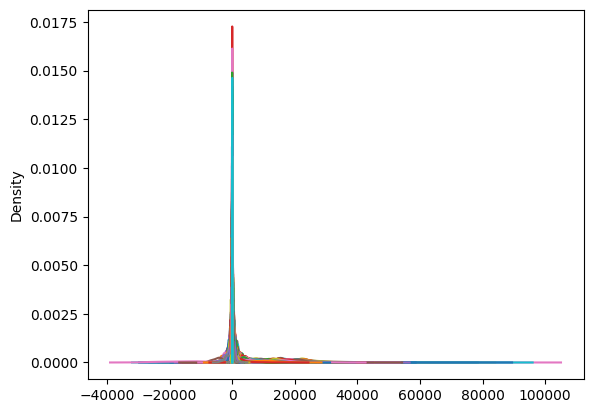

In [30]:
#before feature scaling
X_train = pd.DataFrame(X_train)
X_train.plot(kind="kde", legend=None)

In [34]:
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

In [35]:
#feature scaling
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [36]:
X_train.shape

(54, 7130)

<Axes: ylabel='Density'>

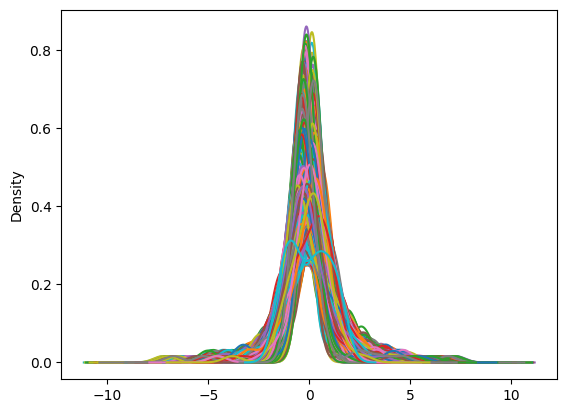

In [37]:
#after feature scaling
X_train = pd.DataFrame(X_train)
X_train.plot(kind="kde", legend=None)

Dimentionality reduction using Principal Component Analysis(PCA)

38 features explain around 90% of the variance. From 7129 features to 38, not too bad.


<BarContainer object of 38 artists>

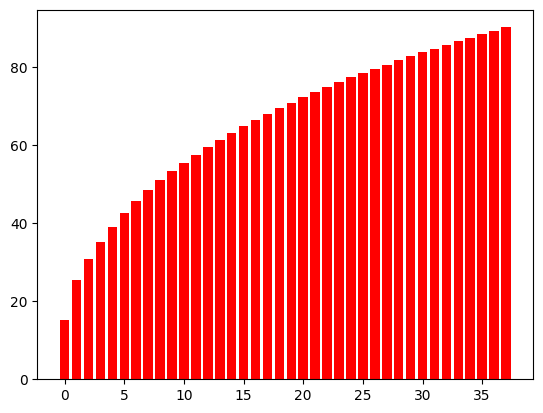

In [38]:
pca = PCA()
pca.fit_transform(X_train)

total = sum(pca.explained_variance_)
k = 0
current_variance = 0
while current_variance/total < 0.90:
    current_variance += pca.explained_variance_[k]
    k = k + 1

print(k, " features explain around 90% of the variance. From 7129 features to ", k, ", not too bad.", sep='')

pca = PCA(n_components=k)
X_train_pca = pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

var_exp = pca.explained_variance_ratio_.cumsum()
var_exp = var_exp*100
plt.bar(range(k), var_exp,color = 'r')

In [39]:
pca.n_components_

38

In [40]:
from mpl_toolkits.mplot3d import Axes3D

pca3 = PCA(n_components=3).fit(X_train)
X_train_reduced = pca3.transform(X_train)

plt.clf()
fig = plt.figure(1, figsize=(10,6))
ax = Axes3D(fig, elev=-150, azim=110,)
ax.scatter(X_train_reduced[:, 0], X_train_reduced[:, 1], X_train_reduced[:, 2], c = y_train, cmap='coolwarm', linewidths=10)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

<ipython-input-40-423fc48f43bd>:12: MatplotlibDeprecationWarning: The w_xaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use xaxis instead.
  ax.w_xaxis.set_ticklabels([])
<ipython-input-40-423fc48f43bd>:14: MatplotlibDeprecationWarning: The w_yaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use yaxis instead.
  ax.w_yaxis.set_ticklabels([])
<ipython-input-40-423fc48f43bd>:16: MatplotlibDeprecationWarning: The w_zaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use zaxis instead.
  ax.w_zaxis.set_ticklabels([])


[Text(-60.0, 0, ''),
 Text(-40.0, 0, ''),
 Text(-20.0, 0, ''),
 Text(0.0, 0, ''),
 Text(20.0, 0, ''),
 Text(40.0, 0, ''),
 Text(60.0, 0, ''),
 Text(80.0, 0, ''),
 Text(100.0, 0, '')]

<Figure size 640x480 with 0 Axes>

Balacing the lables using SMOTE

In [41]:
from sklearn.utils import resample
from collections import Counter

print("Before Upsampling:-")
print(Counter(y_train))


# Let's use SMOTE to oversample
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_train_ov, y_train_ov = oversample.fit_resample(X_train_pca,y_train)

print("After Upsampling:-")
print(Counter(y_train_ov))

Before Upsampling:-
Counter({0: 39, 1: 15})
After Upsampling:-
Counter({0: 39, 1: 39})


Hyperprameter optimization for SVM

In [42]:
# do a grid search
svc_params = [{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
              {'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]

search = GridSearchCV(SVC(), svc_params, n_jobs=-1, verbose=1)
search.fit(X_train_ov, y_train_ov)

best_accuracy = search.best_score_ #to get best score
best_parameters = search.best_params_ #to get best parameters
# select best svc
best_svc = search.best_estimator_
best_svc

Fitting 5 folds for each of 40 candidates, totalling 200 fits


SVC(C=1, kernel='linear')

The accuracy of SVM is 0.7222222222222222

Classification report :
               precision    recall  f1-score   support

           0       0.62      1.00      0.76         8
           1       1.00      0.50      0.67        10

    accuracy                           0.72        18
   macro avg       0.81      0.75      0.71        18
weighted avg       0.83      0.72      0.71        18



Text(0.5, 1.0, 'ROC - CURVE & AREA UNDER CURVE')

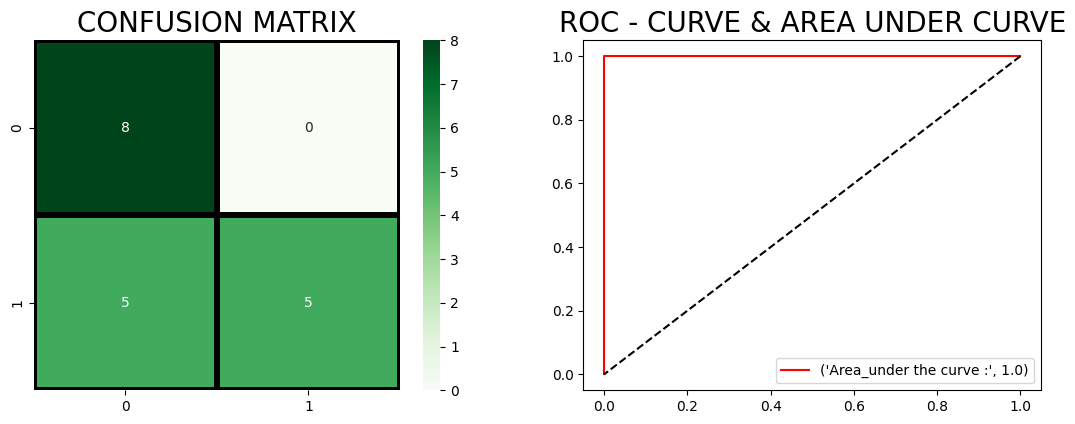

In [43]:
#build SVM model with best parameters
svc_model = SVC(C=1, kernel='linear',probability=True)

svc_model.fit(X_train_ov, y_train_ov)

prediction=svc_model.predict(X_test_pca)

acc_svc = accuracy_score(prediction,y_test)
print('The accuracy of SVM is', acc_svc)
print ("\nClassification report :\n",(classification_report(y_test,prediction)))

#Confusion matrix
plt.figure(figsize=(13,10))
plt.subplot(221)
sns.heatmap(confusion_matrix(y_test,prediction),annot=True, cmap='Greens', fmt = "d",linecolor="k",linewidths=3)
plt.title("CONFUSION MATRIX",fontsize=20)

#ROC curve and Area under the curve plotting
predicting_probabilites = svc_model.predict_proba(X_test_pca)[:,1]
fpr,tpr,thresholds = roc_curve(y_test,predicting_probabilites)
plt.subplot(222)
plt.plot(fpr,tpr,label = ("Area_under the curve :",auc(fpr,tpr)),color = "r")
plt.plot([1,0],[1,0],linestyle = "dashed",color ="k")
plt.legend(loc = "best")
plt.title("ROC - CURVE & AREA UNDER CURVE",fontsize=20)

Kernel = rbf

The accuracy of SVM is 0.7777777777777778

Classification report :
               precision    recall  f1-score   support

           0       0.67      1.00      0.80         8
           1       1.00      0.60      0.75        10

    accuracy                           0.78        18
   macro avg       0.83      0.80      0.77        18
weighted avg       0.85      0.78      0.77        18



Text(0.5, 1.0, 'ROC - CURVE & AREA UNDER CURVE')

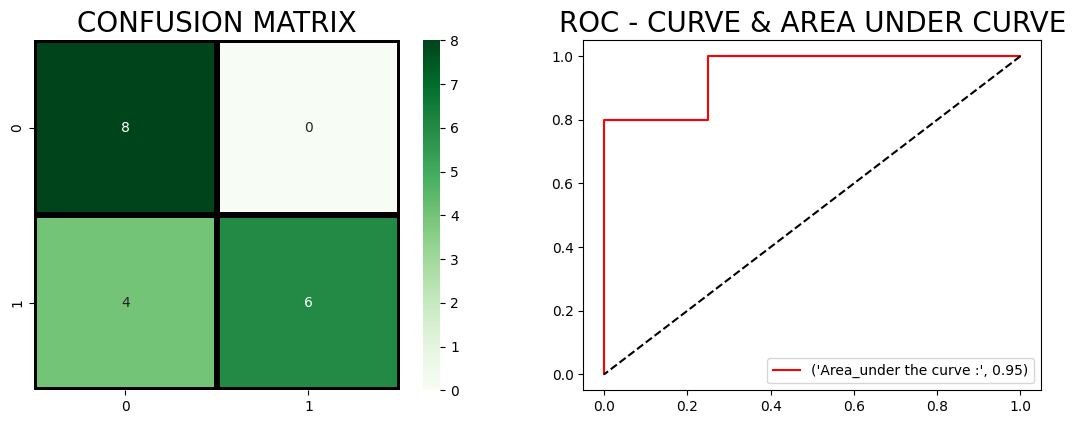

In [58]:
#build SVM model with best parameters
svc_model = SVC(C=1, kernel='rbf',probability=True)

svc_model.fit(X_train_ov, y_train_ov)

prediction=svc_model.predict(X_test_pca)

acc_svc = accuracy_score(prediction,y_test)
print('The accuracy of SVM is', acc_svc)
print ("\nClassification report :\n",(classification_report(y_test,prediction)))

#Confusion matrix
plt.figure(figsize=(13,10))
plt.subplot(221)
sns.heatmap(confusion_matrix(y_test,prediction),annot=True, cmap='Greens', fmt = "d",linecolor="k",linewidths=3)
plt.title("CONFUSION MATRIX",fontsize=20)

#ROC curve and Area under the curve plotting
predicting_probabilites = svc_model.predict_proba(X_test_pca)[:,1]
fpr,tpr,thresholds = roc_curve(y_test,predicting_probabilites)
plt.subplot(222)
plt.plot(fpr,tpr,label = ("Area_under the curve :",auc(fpr,tpr)),color = "r")
plt.plot([1,0],[1,0],linestyle = "dashed",color ="k")
plt.legend(loc = "best")
plt.title("ROC - CURVE & AREA UNDER CURVE",fontsize=20)

Kernel = Polynomial

The accuracy of SVM is 0.4444444444444444

Classification report :
               precision    recall  f1-score   support

           0       0.44      1.00      0.62         8
           1       0.00      0.00      0.00        10

    accuracy                           0.44        18
   macro avg       0.22      0.50      0.31        18
weighted avg       0.20      0.44      0.27        18



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0.5, 1.0, 'ROC - CURVE & AREA UNDER CURVE')

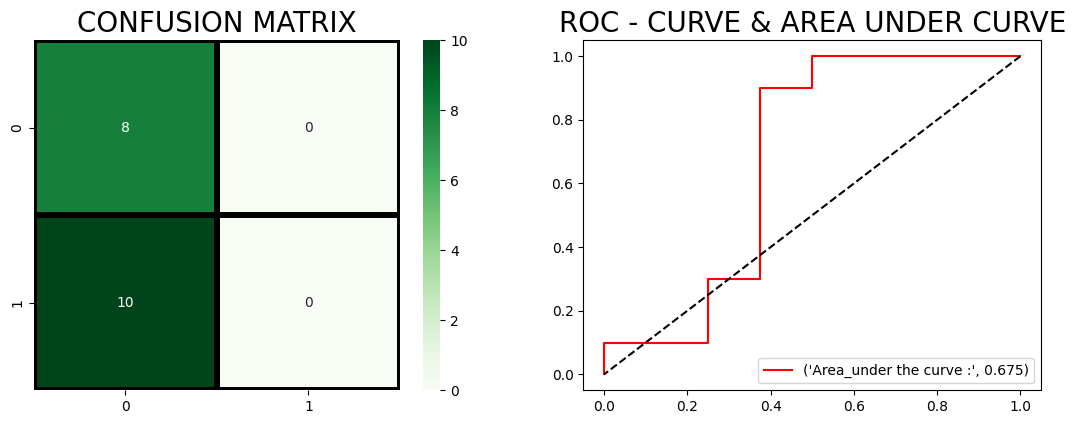

In [59]:
#build SVM model with best parameters
svc_model = SVC(C=1, kernel='poly',probability=True)

svc_model.fit(X_train_ov, y_train_ov)

prediction=svc_model.predict(X_test_pca)

acc_svc = accuracy_score(prediction,y_test)
print('The accuracy of SVM is', acc_svc)
print ("\nClassification report :\n",(classification_report(y_test,prediction)))

#Confusion matrix
plt.figure(figsize=(13,10))
plt.subplot(221)
sns.heatmap(confusion_matrix(y_test,prediction),annot=True, cmap='Greens', fmt = "d",linecolor="k",linewidths=3)
plt.title("CONFUSION MATRIX",fontsize=20)

#ROC curve and Area under the curve plotting
predicting_probabilites = svc_model.predict_proba(X_test_pca)[:,1]
fpr,tpr,thresholds = roc_curve(y_test,predicting_probabilites)
plt.subplot(222)
plt.plot(fpr,tpr,label = ("Area_under the curve :",auc(fpr,tpr)),color = "r")
plt.plot([1,0],[1,0],linestyle = "dashed",color ="k")
plt.legend(loc = "best")
plt.title("ROC - CURVE & AREA UNDER CURVE",fontsize=20)

Hyperprameter optimization for KNN

In [44]:
knn_param = {
    "n_neighbors": [i for i in range(1,30,5)],
    "weights": ["uniform", "distance"],
    "algorithm": ["ball_tree", "kd_tree", "brute"],
    "leaf_size": [1, 10, 30],
    "p": [1,2]
}
search = GridSearchCV(KNeighborsClassifier(), knn_param, n_jobs=-1, verbose=1)
search.fit(X_train_ov, y_train_ov)

best_accuracy = search.best_score_ #to get best score
best_parameters = search.best_params_ #to get best parameters
# select best svc
best_knn = search.best_estimator_
best_knn

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


KNeighborsClassifier(algorithm='ball_tree', leaf_size=1, n_neighbors=1, p=1)

The accuracy of K-NN is 0.7222222222222222

Classification report :
               precision    recall  f1-score   support

           0       0.67      0.75      0.71         8
           1       0.78      0.70      0.74        10

    accuracy                           0.72        18
   macro avg       0.72      0.72      0.72        18
weighted avg       0.73      0.72      0.72        18



Text(0.5, 1.0, 'ROC - CURVE & AREA UNDER CURVE')

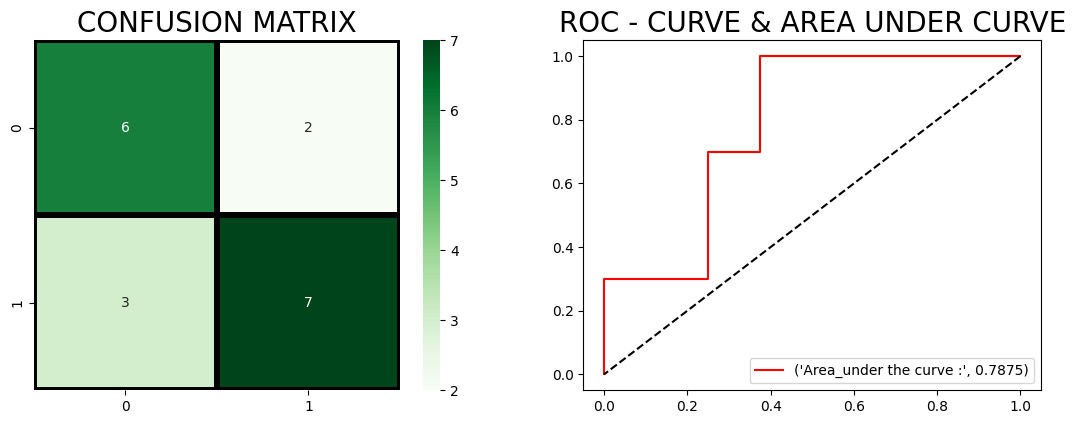

In [45]:
knn_model = KNeighborsClassifier(algorithm='ball_tree', leaf_size=1, n_neighbors=6,
                     weights='distance')

knn_model.fit(X_train_ov,y_train_ov)
prediction=knn_model.predict(X_test_pca)

acc_knn = accuracy_score(prediction,y_test)
print('The accuracy of K-NN is', acc_knn)
print ("\nClassification report :\n",(classification_report(y_test,prediction)))

#Confusion matrix
plt.figure(figsize=(13,10))
plt.subplot(221)
sns.heatmap(confusion_matrix(y_test,prediction),annot=True, cmap='Greens', fmt = "d",linecolor="k",linewidths=3)
plt.title("CONFUSION MATRIX",fontsize=20)

#ROC curve and Area under the curve plotting
predicting_probabilites = knn_model.predict_proba(X_test_pca)[:,1]
fpr,tpr,thresholds = roc_curve(y_test,predicting_probabilites)
plt.subplot(222)
plt.plot(fpr,tpr,label = ("Area_under the curve :",auc(fpr,tpr)),color = "r")
plt.plot([1,0],[1,0],linestyle = "dashed",color ="k")
plt.legend(loc = "best")
plt.title("ROC - CURVE & AREA UNDER CURVE",fontsize=20)

Hyperprameter optimization for Logistic regression

In [46]:
log_grid = {'C': [1e-03, 1e-2, 1e-1, 1, 10],
                 'penalty': ['l1', 'l2']}

log_model = GridSearchCV(estimator=LogisticRegression(solver='liblinear'),
                  param_grid=log_grid,
                  cv=3,
                  scoring='accuracy')
log_model.fit(X_train_ov, y_train_ov)


best_accuracy = log_model.best_score_ #to get best score
best_parameters = log_model.best_params_ #to get best parameters
# select best svc
best_lr = log_model.best_estimator_
best_lr

LogisticRegression(C=0.001, solver='liblinear')

Validation accuracy of Logistic Regression is 0.8333333333333334

Classification report :
               precision    recall  f1-score   support

           0       1.00      0.62      0.77         8
           1       0.77      1.00      0.87        10

    accuracy                           0.83        18
   macro avg       0.88      0.81      0.82        18
weighted avg       0.87      0.83      0.82        18



Text(0.5, 1.0, 'ROC - CURVE & AREA UNDER CURVE')

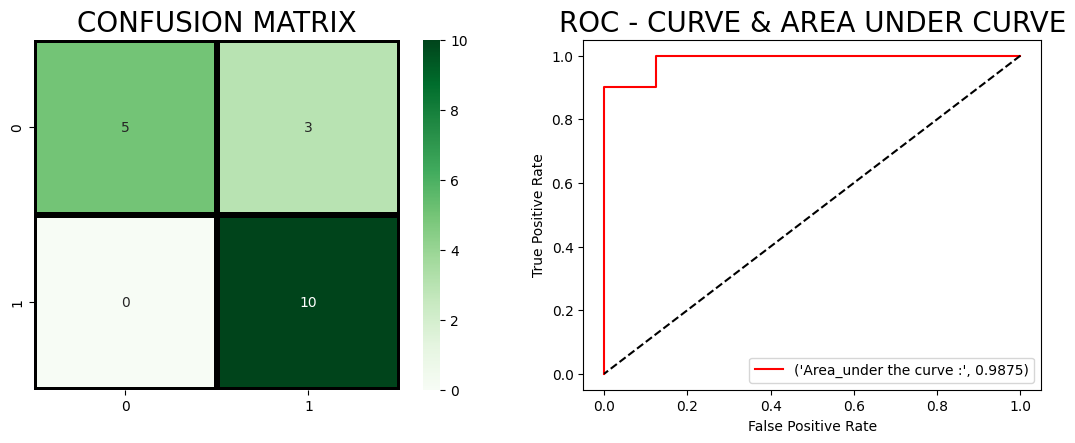

In [47]:
#Logistic Regression
lr_model = LogisticRegression(C=0.001, solver='liblinear')

lr_model.fit(X_train_ov,y_train_ov)

prediction=lr_model.predict(X_test_pca)

acc_log = accuracy_score(prediction,y_test)
print('Validation accuracy of Logistic Regression is', acc_log)
print ("\nClassification report :\n",(classification_report(y_test,prediction)))

#Confusion matrix
plt.figure(figsize=(13,10))
plt.subplot(221)
sns.heatmap(confusion_matrix(y_test,prediction),annot=True,cmap="Greens",fmt = "d",linecolor="k",linewidths=3)
plt.title("CONFUSION MATRIX",fontsize=20)

#ROC curve and Area under the curve plotting
predicting_probabilites = lr_model.predict_proba(X_test_pca)[:,1]
fpr,tpr,thresholds = roc_curve(y_test,predicting_probabilites)
plt.subplot(222)
plt.plot(fpr,tpr,label = ("Area_under the curve :",auc(fpr,tpr)),color = "r")
plt.plot([1,0],[1,0],linestyle = "dashed",color ="k")
plt.legend(loc = "best")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC - CURVE & AREA UNDER CURVE",fontsize=20)

Hyperprameter optimization for Decision trees

In [48]:
params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4, 5, 6], 'max_depth':[3,4,5,6,7,8]}
decision_search = GridSearchCV(DecisionTreeClassifier(random_state=42), params, verbose=1, cv=3)

decision_search.fit(X_train_ov, y_train_ov)


best_accuracy = decision_search.best_score_ #to get best score
best_parameters = decision_search.best_params_ #to get best parameters
# select best svc
best_ds = decision_search.best_estimator_
best_ds

Fitting 3 folds for each of 2940 candidates, totalling 8820 fits


DecisionTreeClassifier(max_depth=3, max_leaf_nodes=5, min_samples_split=6,
                       random_state=42)

Validation accuracy of Decision Tree is 0.7222222222222222

Classification report :
               precision    recall  f1-score   support

           0       0.62      1.00      0.76         8
           1       1.00      0.50      0.67        10

    accuracy                           0.72        18
   macro avg       0.81      0.75      0.71        18
weighted avg       0.83      0.72      0.71        18



Text(0.5, 1.0, 'ROC - CURVE & AREA UNDER CURVE')

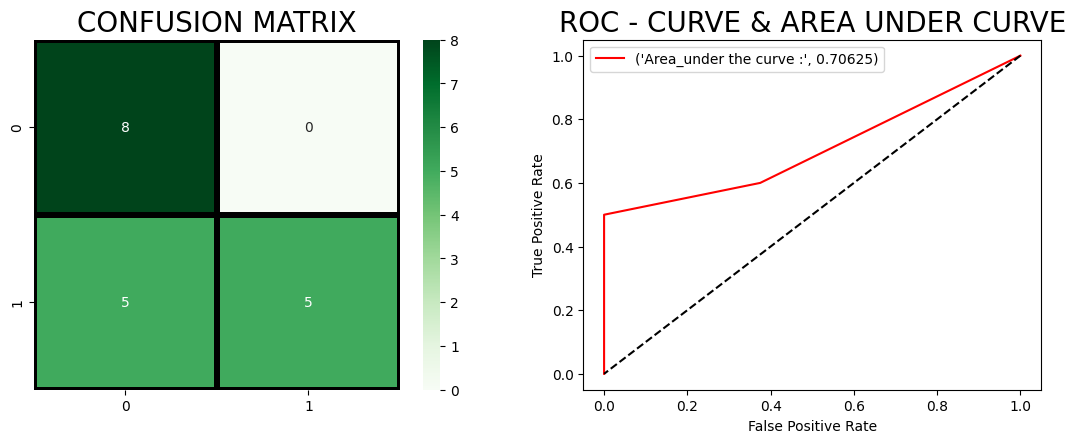

In [49]:
#Decision Tree
ds_model = DecisionTreeClassifier(max_depth=3, max_leaf_nodes=3, random_state=42)

ds_model.fit(X_train_ov,y_train_ov)

prediction=ds_model.predict(X_test_pca)

acc_decision_tree = accuracy_score(prediction,y_test)
print('Validation accuracy of Decision Tree is', acc_decision_tree)
print ("\nClassification report :\n",(classification_report(y_test,prediction)))

#Confusion matrix
plt.figure(figsize=(13,10))
plt.subplot(221)
sns.heatmap(confusion_matrix(y_test,prediction),annot=True,cmap="Greens",fmt = "d",linecolor="k",linewidths=3)
plt.title("CONFUSION MATRIX",fontsize=20)

#ROC curve and Area under the curve plotting
predicting_probabilites = ds_model.predict_proba(X_test_pca)[:,1]
fpr,tpr,thresholds = roc_curve(y_test,predicting_probabilites)
plt.subplot(222)
plt.plot(fpr,tpr,label = ("Area_under the curve :",auc(fpr,tpr)),color = "r")
plt.plot([1,0],[1,0],linestyle = "dashed",color ="k")
plt.legend(loc = "best")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC - CURVE & AREA UNDER CURVE",fontsize=20)

Hyperprameter optimization for Random forest

In [50]:
# Hyperparameters search grid
rf_param_grid = {'bootstrap': [False, True],
         'n_estimators': [60, 70, 80, 90, 100],
         'max_features': [0.6, 0.65, 0.7, 0.75, 0.8],
         'min_samples_leaf': [8, 10, 12, 14],
         'min_samples_split': [3, 5, 7]
        }

# Create the GridSearchCV object
rf_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=rf_param_grid, cv=3, scoring='accuracy')
rf_search.fit(X_train_ov, y_train_ov)

best_accuracy = rf_search.best_score_ #to get best score
best_parameters = rf_search.best_params_ #to get best parameters
# select best svc
best_rf = rf_search.best_estimator_
best_rf

RandomForestClassifier(max_features=0.6, min_samples_leaf=8,
                       min_samples_split=5, n_estimators=80)

Validation accuracy of RandomForest Classifier is 0.7222222222222222

Classification report :
               precision    recall  f1-score   support

           0       0.62      1.00      0.76         8
           1       1.00      0.50      0.67        10

    accuracy                           0.72        18
   macro avg       0.81      0.75      0.71        18
weighted avg       0.83      0.72      0.71        18



Text(0.5, 1.0, 'ROC - CURVE & AREA UNDER CURVE')

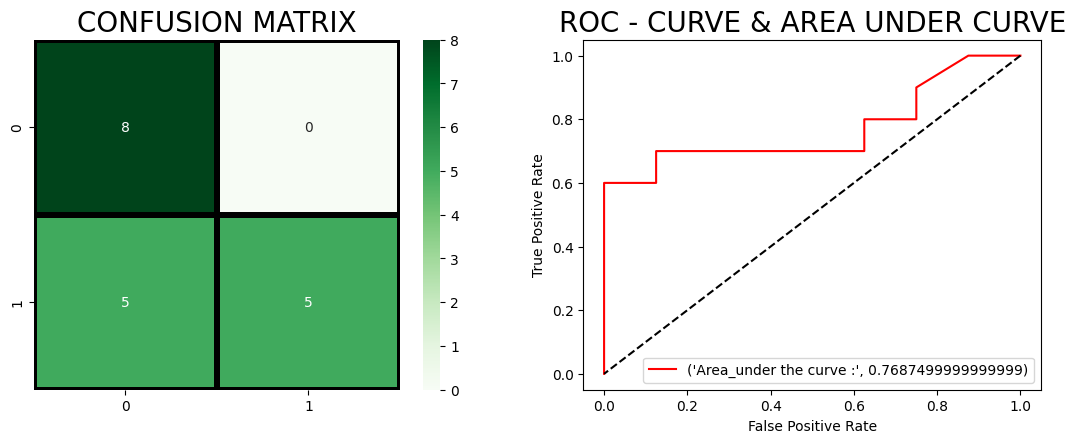

In [51]:
#Random forest
rf_model = RandomForestClassifier(bootstrap=False, max_features=0.6, min_samples_leaf=8,
                       min_samples_split=3, n_estimators=70)

rf_model.fit(X_train_ov,y_train_ov)

prediction=rf_model.predict(X_test_pca)

acc_random_forest = accuracy_score(prediction,y_test)
print('Validation accuracy of RandomForest Classifier is', acc_random_forest)
print ("\nClassification report :\n",(classification_report(y_test,prediction)))

#Confusion matrix
plt.figure(figsize=(13,10))
plt.subplot(221)
sns.heatmap(confusion_matrix(y_test,prediction),annot=True,cmap="Greens",fmt = "d",linecolor="k",linewidths=3)
plt.title("CONFUSION MATRIX",fontsize=20)

#ROC curve and Area under the curve plotting
predicting_probabilites = rf_model.predict_proba(X_test_pca)[:,1]
fpr,tpr,thresholds = roc_curve(y_test,predicting_probabilites)
plt.subplot(222)
plt.plot(fpr,tpr,label = ("Area_under the curve :",auc(fpr,tpr)),color = "r")
plt.plot([1,0],[1,0],linestyle = "dashed",color ="k")
plt.legend(loc = "best")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC - CURVE & AREA UNDER CURVE",fontsize=20)

Hyperprameter optimization for XGBoost

In [52]:
xgb_grid_params = {'max_depth': [3, 4, 5, 6, 7, 8, 10, 12],
               'min_child_weight': [1, 2, 4, 6, 8, 10, 12, 15],
               'n_estimators': [40, 50, 60, 70, 80, 90, 100, 110, 120, 130],
               'learning_rate': [0.001, 0.01, 0.05, 0.1, 0.2, 0.3]}

# Create the GridSearchCV object
xgb_search = GridSearchCV(estimator=xgb.XGBClassifier(), param_grid=xgb_grid_params, cv=3, scoring='accuracy')
xgb_search.fit(X_train_ov, y_train_ov)

best_accuracy = xgb_search.best_score_ #to get best score
best_parameters = xgb_search.best_params_ #to get best parameters
# select best svc
best_xgb = xgb_search.best_estimator_
best_xgb

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=2, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=60, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

Validation accuracy of XG Boost is 0.7222222222222222

Classification report :
               precision    recall  f1-score   support

           0       0.62      1.00      0.76         8
           1       1.00      0.50      0.67        10

    accuracy                           0.72        18
   macro avg       0.81      0.75      0.71        18
weighted avg       0.83      0.72      0.71        18



/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [11:03:08] WARNING: /workspace/src/common/error_msg.cc:45: `gpu_id` is deprecated since2.0.0, use `device` instead. E.g. device=cpu/cuda/cuda:0
  warnings.warn(smsg, UserWarning)


Text(0.5, 1.0, 'ROC - CURVE & AREA UNDER CURVE')

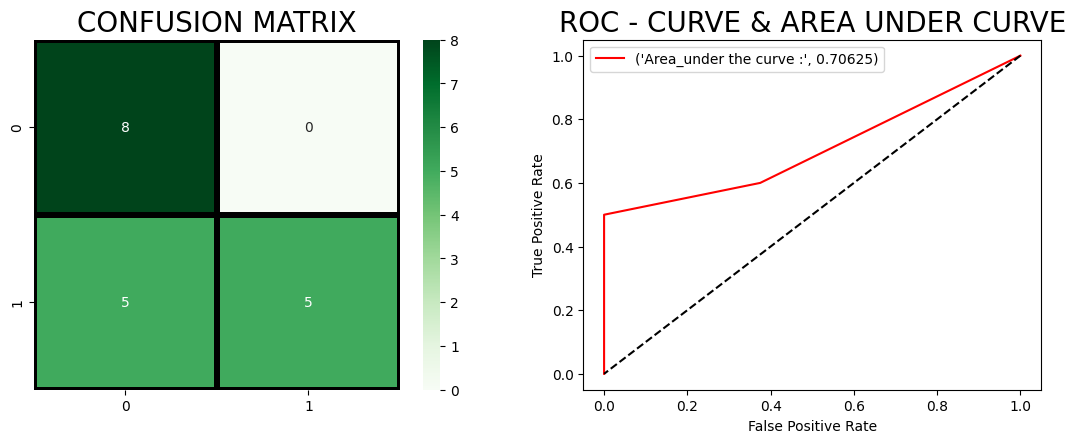

In [53]:
#XB Boost
xgb_model = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.001, max_delta_step=0, max_depth=3,
              min_child_weight=1, monotone_constraints='()',
              n_estimators=40, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

xgb_model.fit(X_train_ov,y_train_ov)

prediction=xgb_model.predict(X_test_pca)
acc_xgb = accuracy_score(prediction,y_test)
print('Validation accuracy of XG Boost is', acc_xgb)
print ("\nClassification report :\n",(classification_report(y_test,prediction)))

#Confusion matrix
plt.figure(figsize=(13,10))
plt.subplot(221)
sns.heatmap(confusion_matrix(y_test,prediction),annot=True,cmap="Greens",fmt = "d",linecolor="k",linewidths=3)
plt.title("CONFUSION MATRIX",fontsize=20)

#ROC curve and Area under the curve plotting
predicting_probabilites = xgb_model.predict_proba(X_test_pca)[:,1]
fpr,tpr,thresholds = roc_curve(y_test,predicting_probabilites)
plt.subplot(222)
plt.plot(fpr,tpr,label = ("Area_under the curve :",auc(fpr,tpr)),color = "r")
plt.plot([1,0],[1,0],linestyle = "dashed",color ="k")
plt.legend(loc = "best")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC - CURVE & AREA UNDER CURVE",fontsize=20)

In [54]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 'Decision Tree',
              'Random Forest', 'XG Boost'],

    'Score': [acc_svc, acc_knn, acc_log, acc_decision_tree,
              acc_random_forest, acc_xgb]})
models.sort_values(by='Score', ascending=False)

,Model,Score
2,Logistic Regression,0.833333
0,Support Vector Machines,0.722222
1,KNN,0.722222
3,Decision Tree,0.722222
4,Random Forest,0.722222
5,XG Boost,0.722222


Hyperprameter optimization for MLPClassifier

In [55]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for MLP
mlp_params = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
    'activation': ['relu', 'tanh'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.001, 0.01],
}

# Create the MLP grid search
mlp_search = GridSearchCV(MLPClassifier(random_state=42, max_iter=500), mlp_params, verbose=1, cv=3)
# Fit the grid search to your data
mlp_search.fit(X_train_ov, y_train_ov)
# Get the best accuracy and parameters
best_accuracy_mlp = mlp_search.best_score_
best_parameters_mlp = mlp_search.best_params_
# Select the best MLP classifier
best_mlp = mlp_search.best_estimator_
best_accuracy_mlp, best_parameters_mlp, best_mlp

Fitting 3 folds for each of 48 candidates, totalling 144 fits


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

(0.9487179487179488,
 {'activation': 'relu',
  'alpha': 0.0001,
  'hidden_layer_sizes': (100,),
  'solver': 'sgd'},
 MLPClassifier(max_iter=500, random_state=42, solver='sgd'))

Validation accuracy of MLP is 0.6111111111111112

Classification report:
               precision    recall  f1-score   support

           0       0.57      0.50      0.53         8
           1       0.64      0.70      0.67        10

    accuracy                           0.61        18
   macro avg       0.60      0.60      0.60        18
weighted avg       0.61      0.61      0.61        18



Text(0.5, 1.0, 'ROC - CURVE & AREA UNDER CURVE')

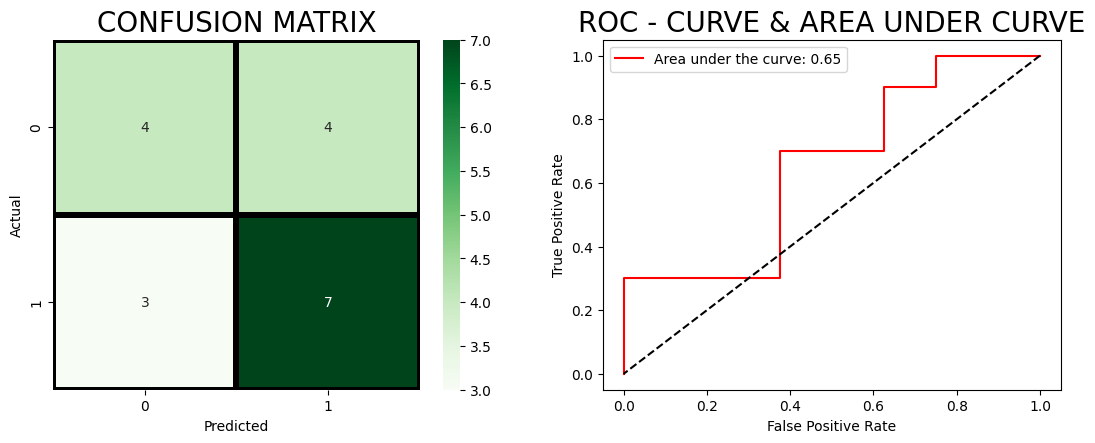

In [57]:
# Create MLP model
mlp_model = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', alpha=0.0001,
                          max_iter=500, random_state=42)

# Fit the MLP model
mlp_model.fit(X_train_ov, y_train_ov)
# Make predictions
prediction_mlp = mlp_model.predict(X_test_pca)
# Calculate accuracy
acc_mlp = accuracy_score(prediction_mlp, y_test)
print('Validation accuracy of MLP is', acc_mlp)
# Classification report
print("\nClassification report:\n", classification_report(y_test, prediction_mlp))

# Confusion matrix
plt.figure(figsize=(13, 10))
plt.subplot(221)
sns.heatmap(confusion_matrix(y_test, prediction_mlp), annot=True, cmap="Greens", fmt="d", linecolor="k", linewidths=3)
plt.title("CONFUSION MATRIX", fontsize=20)
plt.xlabel('Predicted')
plt.ylabel('Actual')

# ROC curve and Area under the curve plotting
predicting_probabilities_mlp = mlp_model.predict_proba(X_test_pca)[:, 1]
fpr_mlp, tpr_mlp, thresholds_mlp = roc_curve(y_test, predicting_probabilities_mlp)
plt.subplot(222)
plt.plot(fpr_mlp, tpr_mlp, label="Area under the curve: {:.2f}".format(auc(fpr_mlp, tpr_mlp)), color="r")
plt.plot([1, 0], [1, 0], linestyle="dashed", color="k")
plt.legend(loc="best")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC - CURVE & AREA UNDER CURVE", fontsize=20)